<a href="https://colab.research.google.com/github/davidogm/DataScience/blob/main/MCSO/notebooks/11_functional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# La API funcional "Keras" en TensorFlow

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/guide/keras/functional"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />Ver en TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs-l10n/blob/master/site/es-419/guide/keras/functional.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Correr en Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs-l10n/blob/master/site/es-419/guide/keras/functional.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver código fuente en GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs-l10n/site/es-419/guide/keras/functional.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Descargar notebook</a>
  </td>
</table>

Note: Nuestra comunidad de Tensorflow ha traducido estos documentos. Como las traducciones de la comunidad
son basados en el "mejor esfuerzo", no hay ninguna garantia que esta sea un reflejo preciso y actual 
de la [Documentacion Oficial en Ingles](https://www.tensorflow.org/?hl=en).
Si tienen sugerencias sobre como mejorar esta traduccion, por favor envian un "Pull request"
al siguiente repositorio [tensorflow/docs](https://github.com/tensorflow/docs).
Para ofrecerse como voluntario o hacer revision de las traducciones de la Comunidad
por favor contacten al siguiente grupo [docs@tensorflow.org list](https://groups.google.com/a/tensorflow.org/forum/#!forum/docs).

## Setup

In [ ]:
import tensorflow as tf

tf.keras.backend.clear_session()  # Reseteo sencillo

## Introduccion

Ya estás familiarizado con el uso del metodo `keras.Sequential()` para crear modelos.
La API funcional es una forma de crear modelos mas dinamicos que con ` Sequential `: La API funcional puede manejar modelos con topología no lineal, modelos con capas compartidas y modelos con múltiples entradas o salidas.

Se basa en la idea de que un modelo de aprendizaje profundo
suele ser un gráfico acíclico dirigido (DAG) de capas.
La API funcional es un conjunto de herramientas para **construir gráficos de capas**.

Considera el siguiente modelo:

```
(input: 784-vectores dimensionales)
       ↧
[Dense (64 units, activacion relu)]
       ↧
[Dense (64 units, activacion relu)]
       ↧
[Dense (10 units, activacion softmax)]
       ↧
(output: distribución de probabilidad en 10 clases)
```

Es una simple grafica de tres capas.

Para construir este modelo con la API funcional,
comenzarías creando un nodo de entrada:

In [ ]:
from tensorflow import keras

inputs = keras.Input(shape=(784,))

Aqui solo especificamos el tipo de nuestra data set: 784-vectores dimensionales.
Nota que el tamaño del batch siempre debe ser omitido, solo se incluye el tipo de la data set.
Para una input de tipo imágen ` (31,32,3) ` hubiese sido:

In [ ]:
img_inputs = keras.Input(shape=(32, 32, 3))

Lo que se devuelve, ` input `, contiene información sobre la forma y el tipo de dato que se espera ingresa en tu modelo:

In [ ]:
inputs.shape

TensorShape([None, 784])

In [ ]:
inputs.dtype

tf.float32

Puedes crear un nuevo nodo en el grafico de capas mandando a llamar al objeto ` input `.

In [ ]:
from tensorflow.keras import layers

dense = layers.Dense(64, activation='relu')
x = dense(inputs)

La acción "layer call" es como dibujar una flecha desde "entradas" a la capa que creamos.
Estamos "pasando" las entradas a la capa `dense`, y afuera obtenemos` x`.

Agreguemos algunas capas más a nuestro gráfico de capas:

La acción "llamada a la capa" es como dibujar una flecha de "entradas" a la capa que creamos.

Estamos pasando las entradas a una capa mas densa, y respecto a la salida obtenemos una ` x `.

In [ ]:
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

LLegados a este punto, podemos crear un ` Modelo ` especificando sus entradas y salidas en las capas de graficas.

In [ ]:
model = keras.Model(inputs=inputs, outputs=outputs)

Recapitulando, esta es nuestra definción completa del proceso:

In [ ]:
inputs = keras.Input(shape=(784,), name='img')
x = layers.Dense(64, activation='relu')(inputs)
x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='mnist_model')

Veamos como se muestra el model summary:

In [ ]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 784)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


También podemos trazar el modelo como un gráfico:

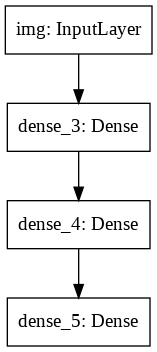

In [ ]:
keras.utils.plot_model(model, 'my_first_model.png')

Y opcionalmente mostrar la entrada y la salida de la forma de cada capa en la gráfica ploteada:

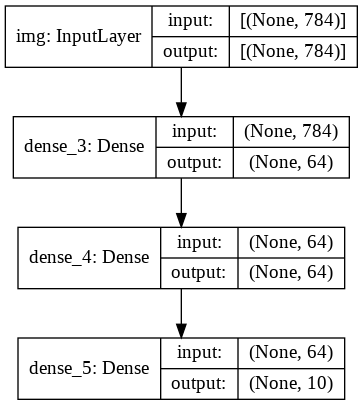

In [ ]:
keras.utils.plot_model(model, 'my_first_model_with_shape_info.png', show_shapes=True)

Esta figura y el código que escribimos son prácticamente idénticos. En la versión de código, las flechas de conexión simplemente se reemplazan por la operación de llamada.

Un "gráfico de capas" es una imagen mental muy intuitiva para un modelo de aprendizaje profundo, y la API funcional es una forma de crear modelos que reflejan de cerca esta imagen mental.


## Entrenamiento, evaluación e inferencia.

El entrenamiento, la evaluación y la inferencia funcionan exactamente de la misma manera para los modelos construidos
utilizando la API funcional como para los modelos secuenciales.

Aquí hay una demostración rápida.

Aquí cargamos datos de imagen MNIST, los rediseñamos en vectores,
ajustar el modelo en los datos (mientras se monitorea el rendimiento en una división de validación),
y finalmente evaluamos nuestro modelo en los datos de prueba:

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])
history = model.fit(x_train, y_train,
                    batch_size=64,
                    epochs=5,
                    validation_split=0.2)
test_scores = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
750/750 [==============================] - 3s 3ms/step - loss: 0.5913 - accuracy: 0.8343 - val_loss: 0.1752 - val_accuracy: 0.9496
Epoch 2/5
750/750 [==============================] - 2s 2ms/step - loss: 0.1629 - accuracy: 0.9514 - val_loss: 0.1398 - val_accuracy: 0.9600
Epoch 3/5
750/750 [==============================] - 2s 2ms/step - loss: 0.1145 - accuracy: 0.9652 - val_loss: 0.1162 - val_accuracy: 0.9665
Epoch 4/5
750/750 [==============================] - 2s 2ms/step - loss: 0.0909 - accuracy: 0.9727 - val_loss: 0.1183 - val_accuracy: 0.9673
Epoch 5/5
750/750 [==============================] - 2s 2ms/step - loss: 0.0748 - accuracy: 0.9766 - val_loss: 0.1060 - val_accuracy: 0.9711
313/313 - 0s - loss: 0.0959 - accuracy: 0.9723
Test loss: 0.09590265154838562
Test accuracy: 0.9722999930381775


Para obtener una guía completa sobre el entrenamiento y evaluación de modelos, consulta [Guía de entrenamiento y evaluación](./train_and_evaluate.ipynb).

## Almacenado y serialización

El almacenado y la serialización funcionan exactamente de la misma manera para los modelos construidos
utilizando la API funcional como para los modelos secuenciales.

Una forma estándar de guardar un modelo funcional es llamar a `model.save ()` para guardar todo el modelo en un solo archivo.
Posteriormente, puede volver a crear el mismo modelo a partir de este archivo, incluso si ya no tiene acceso al código.
eso creó el modelo.

Este archivo incluye:
- La arquitectura del modelo.
- Los valores de peso del modelo (que se aprendieron durante el entrenamiento)
- La configuración de entrenamiento del modelo (lo que pasó a `compilar`), si corresponde
- El optimizador y su estado, si corresponde (esto le permite reiniciar el entrenamiento donde lo dejó)

In [ ]:
model.save('path_to_my_model.h5')
del model
# Recrea el mismo modelo, desde el archivo:
model = keras.models.load_model('path_to_my_model.h5')

Para obtener una guía completa sobre el guardado de modelos, consulta [Guía para guardar y serializar modelos](./save_and_serialize.ipynb).

## Usando el mismo gráfico de capas para definir múltiples modelos


En la API funcional, los modelos se crean especificando sus entradas
y salidas en un gráfico de capas. Eso significa que un solo gráfico de capas
Se puede utilizar para generar múltiples modelos.

En el siguiente ejemplo, usamos la misma arquitectura de capas para crear instancias de dos modelos:
un modelo de "codificador" que convierte las entradas de imagen en vectores de 16 dimensiones,
y un modelo completo de `autoencoder` para entrenamiento.


In [ ]:
encoder_input = keras.Input(shape=(28, 28, 1), name='img')
x = layers.Conv2D(16, 3, activation='relu')(encoder_input)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(16, 3, activation='relu')(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')
encoder.summary()

x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu')(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation='relu')(x)

autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                0   

Tenga en cuenta que hacemos que la arquitectura de decodificación sea estrictamente simétrica a la arquitectura de codificación,
para que obtengamos una forma de salida que sea igual a la forma de entrada `(28, 28, 1)`.
El reverso de una capa `Conv2D` es una capa` Conv2DTranspose`, y el reverso de una capa `MaxPooling2D`
La capa es una capa `UpSampling2D`.

## Todos los modelos son invocables, al igual que las capas.

Puede tratar cualquier modelo como si fuera una capa, llamándolo en una `Entrada` o en la salida de otra capa.
Tenga en cuenta que al llamar a un modelo no solo está reutilizando la arquitectura del modelo, también está reutilizando sus pesos.

Veamos esto en acción. Aquí hay una versión diferente del ejemplo de autoencoder que crea un modelo de codificador, un modelo de decodificador,
y encadenarlos en dos llamadas para obtener el modelo de autoencoder:

In [ ]:
encoder_input = keras.Input(shape=(28, 28, 1), name='original_img')
x = layers.Conv2D(16, 3, activation='relu')(encoder_input)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(16, 3, activation='relu')(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name='encoder')
encoder.summary()

decoder_input = keras.Input(shape=(16,), name='encoded_img')
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu')(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation='relu')(x)

decoder = keras.Model(decoder_input, decoder_output, name='decoder')
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name='img')
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name='autoencoder')
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 16)                0   

Como puede ver, el modelo puede estar anidado: un modelo puede contener submodelos (ya que un modelo es como una capa).

Un caso de uso común para la anidación de modelos es * ensamblaje *.
Como ejemplo, a continuación se explica cómo agrupar un conjunto de modelos en un solo modelo que promedia sus predicciones:

# **Hasta aquí**

In [ ]:
def get_model():
  inputs = keras.Input(shape=(128,))
  outputs = layers.Dense(1, activation='sigmoid')(inputs)
  return keras.Model(inputs, outputs)

model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)

## Manipulación de topologías gráficas complejas


### Modelos con múltiples entradas y salidas

La API funcional facilita la manipulación de múltiples entradas y salidas.
Esto no se puede manejar con la API secuencial.

Aquí hay un ejemplo simple.

Supongamos que está creando un sistema para clasificar los tickets de emisión personalizados por prioridad y enrutarlos al departamento correcto.

Tu modelo tendrá 3 entradas:

- Título del ticket (entrada de texto)
- Cuerpo del texto del ticket (entrada de texto)
- Cualquier etiqueta agregada por el usuario (entrada categórica)

Tendrá dos salidas:

- Puntuación de prioridad entre 0 y 1 (salida sigmoidea escalar)
- El departamento que debe manejar el ticket (salida softmax sobre el conjunto de departamentos)

Construyamos este modelo en pocas líneas con la API funcional.

In [ ]:
num_tags = 12  # Número de etiquetas de problemas únicos
num_words = 10000  # Tamaño del vocabulario obtenido al preprocesar datos de texto
num_departments = 4  # Número de departamentos para predicciones.

title_input = keras.Input(shape=(None,), name='title')  # Secuencia de longitud variable de entradas
body_input = keras.Input(shape=(None,), name='body')  # Secuencia de longitud variable de entradas
tags_input = keras.Input(shape=(num_tags,), name='tags')  # Vectores binarios de tamaño `num_tags`

# Ingresa cada palabra en el título en un vector de 64 dimensiones
title_features = layers.Embedding(num_words, 64)(title_input)
# Ingresa cada palabra en el texto en un vector de 64 dimensiones
body_features = layers.Embedding(num_words, 64)(body_input)

# Reduce la secuencia de palabras ingresadas en el título en un solo vector de 128 dimensiones
title_features = layers.LSTM(128)(title_features)
# Reduce la secuencia de palabras ingresadas en el cuerpo en un solo vector de 32 dimensiones
body_features = layers.LSTM(32)(body_features)

# Combina todas las funciones disponibles en un solo vector grande mediante concatenación
x = layers.concatenate([title_features, body_features, tags_input])

# Pegua una regresión logística para la predicción de prioridad en la parte superior de las características
priority_pred = layers.Dense(1, activation='sigmoid', name='priority')(x)
# Stick a department classifier on top of the features
department_pred = layers.Dense(num_departments, activation='softmax', name='department')(x)

# Instancia un modelo de extremo a extremo que prediga tanto la prioridad como el departamento
model = keras.Model(inputs=[title_input, body_input, tags_input],
                    outputs=[priority_pred, department_pred])

Ploteando el modelo:

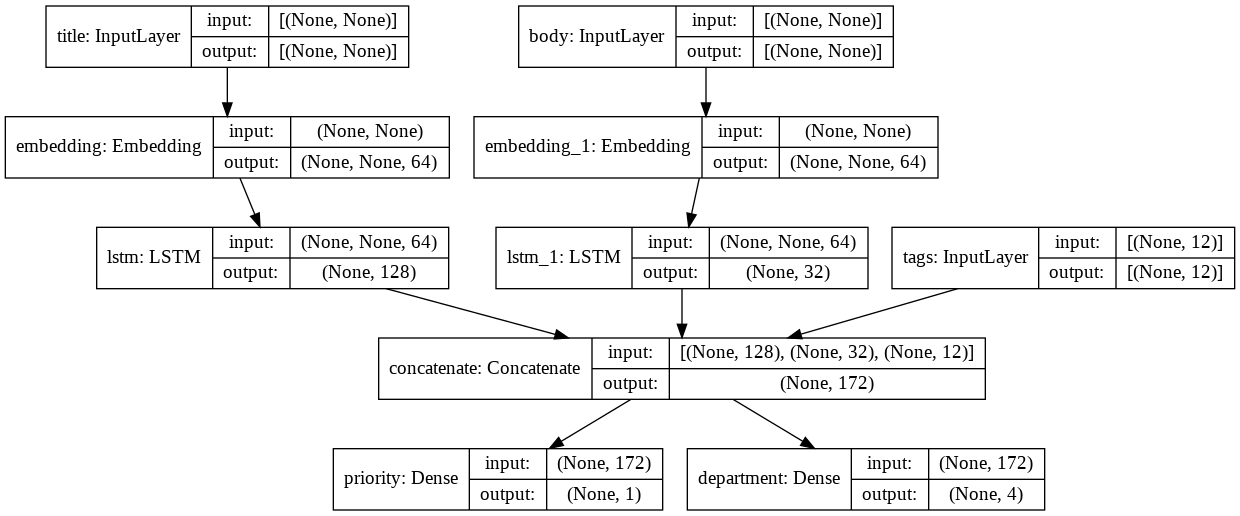

In [ ]:
keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)

Al compilar este modelo, podemos asignar diferentes pérdidas a cada salida.
Incluso puede asignar diferentes pesos a cada pérdida, para modular su
contribución a la pérdida total de entrenamiento.

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
              loss=['binary_crossentropy', 'categorical_crossentropy'],
              loss_weights=[1., 0.2])

Como dimos nombres a nuestras capas de salida, también podríamos especificar la pérdida de esta manera:

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
              loss={'priority': 'binary_crossentropy',
                    'department': 'categorical_crossentropy'},
              loss_weights=[1., 0.2])

Podemos entrenar el modelo pasando listas de matrices Numpy de entradas y objetivos:

In [ ]:
import numpy as np

# Datos de entrada ficticios
title_data = np.random.randint(num_words, size=(1280, 10))
body_data = np.random.randint(num_words, size=(1280, 100))
tags_data = np.random.randint(2, size=(1280, num_tags)).astype('float32')
# Datos objetivo ficticios
priority_targets = np.random.random(size=(1280, 1))
dept_targets = np.random.randint(2, size=(1280, num_departments))

model.fit({'title': title_data, 'body': body_data, 'tags': tags_data},
          {'priority': priority_targets, 'department': dept_targets},
          epochs=2,
          batch_size=32)

Epoch 1/2
40/40 [==============================] - 5s 40ms/step - loss: 1.2905 - priority_loss: 0.6994 - department_loss: 2.9553
Epoch 2/2
40/40 [==============================] - 2s 38ms/step - loss: 1.3070 - priority_loss: 0.6994 - department_loss: 3.0379


Al llamar al ajuste con un objeto `Dataset`, debería producir un
tupla de listas como `([title_data, body_data, tags_data], [priority_targets, dept_targets])`
o una tupla de diccionarios como
`({'title': title_data, 'body': body_data, 'tags': tags_data}, {'priority': priority_targets, 'department': dept_targets})`.

Para obtener una explicación más detallada, consulta la guía completa [Guía de entrenamiento y evaluación](./train_and_evaluate.ipynb).

### Un modelo de Red neuronal residual de juguete

Además de los modelos con múltiples entradas y salidas,
La API funcional facilita la manipulación de topologías de conectividad no lineal,
es decir, modelos donde las capas no están conectadas secuencialmente.
Esto tampoco se puede manejar con la API secuencial (como su nombre lo indica).

Un caso de uso común para esto son las conexiones residuales.

Construyamos un modelo de ResNet de juguete para CIFAR10 para demostrar esto.

In [ ]:
inputs = keras.Input(shape=(32, 32, 3), name='img')
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(64, 3, activation='relu')(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_1_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation='relu', padding='same')(block_2_output)
x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation='relu')(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs, outputs, name='toy_resnet')
model.summary()

Ploteando el modelo:

In [ ]:
keras.utils.plot_model(model, 'mini_resnet.png', show_shapes=True)

Vamos a entrenarlo:

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
              loss='categorical_crossentropy',
              metrics=['acc'])
model.fit(x_train, y_train,
          batch_size=64,
          epochs=1,
          validation_split=0.2)

## Compartir capas

Otro buen uso de la API funcional son los modelos que usan capas compartidas. Las capas compartidas son instancias de capa que se reutilizan varias veces en un mismo modelo: aprenden características que corresponden a múltiples rutas en el gráfico de capas.

Las capas compartidas a menudo se usan para codificar entradas que provienen de espacios similares (por ejemplo, dos piezas de texto diferentes que presentan un vocabulario similar), ya que permiten compartir información entre estas diferentes entradas y hacen posible entrenar un modelo de este tipo en menos datos. Si se ve una palabra determinada en una de las entradas, eso beneficiará el procesamiento de todas las entradas que pasan por la capa compartida.

Para compartir una capa en la API funcional, simplemente llame a la misma instancia de capa varias veces. Por ejemplo, aquí hay una capa `Ingresa (del ingles Embedding)` compartida entre dos entradas de texto diferentes:

In [ ]:
# Ingreso de 1000 palabras únicas asignadas a vectores de 128 dimensiones
shared_embedding = layers.Embedding(1000, 128)

# Secuencia de longitud variable de enteros
text_input_a = keras.Input(shape=(None,), dtype='int32')

# Secuencia de longitud variable de enteros
text_input_b = keras.Input(shape=(None,), dtype='int32')

# Reutilizamos la misma capa para codificar ambas entradas
encoded_input_a = shared_embedding(text_input_a)
encoded_input_b = shared_embedding(text_input_b)

## Extracción y reutilización de nodos en el gráfico de capas

Debido a que el gráfico de capas que está manipulando en la API funcional es una estructura de datos estática, se puede acceder e inspeccionarlo. Así es como podemos trazar modelos funcionales como imágenes, por ejemplo.

Esto también significa que podemos acceder a las activaciones de capas intermedias ("nodos" en el gráfico) y reutilizarlas en otros lugares. ¡Esto es extremadamente útil para la extracción de características, por ejemplo!

Veamos un ejemplo. Este es un modelo VGG19 con pesas pre-entrenadas en ImageNet:

In [ ]:
from tensorflow.keras.applications import VGG19

vgg19 = VGG19()

Y estas son las activaciones intermedias del modelo, obtenidas al consultar la estructura de datos del gráfico:

In [ ]:
features_list = [layer.output for layer in vgg19.layers]

Podemos usar estas características para crear un nuevo modelo de extracción de características, que devuelve los valores de las activaciones de la capa intermedia, y podemos hacer todo esto en 3 líneas.

In [ ]:
feat_extraction_model = keras.Model(inputs=vgg19.input, outputs=features_list)

img = np.random.random((1, 224, 224, 3)).astype('float32')
extracted_features = feat_extraction_model(img)

Esto es útil cuando [implementa la transferencia de estilo neural] (https://medium.com/tensorflow/neural-style-transfer-creating-art-with-deep-learning-using-tf-keras-and-eager-execution- 7d541ac31398), entre otras cosas.

## Extendiendo la API escribiendo capas personalizadas

tf.keras tiene una amplia gama de capas incorporadas. Aquí están algunos ejemplos:

- Capas convolucionales: `Conv1D`,` Conv2D`, `Conv3D`,` Conv2DTranspose`, etc.
- Capas de agrupación: `MaxPooling1D`,` MaxPooling2D`, `MaxPooling3D`,` AveragePooling1D`, etc.
- Capas RNN: `GRU`,` LSTM`, `ConvLSTM2D`, etc.
- `BatchNormalization`,` Dropout`, `Embedded`, etc.

Si no encuentras lo que necesitas, es fácil extender la API creando tus propias capas.

Todas las capas subclasifican la clase `Layer` e implementan:
- Un método `call`, que especifica el cálculo realizado por la capa.
- Un método `build`, que crea los pesos de la capa (tenga en cuenta que esto es solo una convención de estilo; también puede crear pesos en` __init__`).

Para obtener más información sobre cómo crear capas desde cero, consulta la guía [Guía para escribir capas y modelos desde cero](./custom_layers_and_models.ipynb).

Aquí hay una implementación simple de una capa `Densa`:

In [ ]:
class CustomDense(layers.Layer):

  def __init__(self, units=32):
    super(CustomDense, self).__init__()
    self.units = units

  def build(self, input_shape):
    self.w = self.add_weight(shape=(input_shape[-1], self.units),
                             initializer='random_normal',
                             trainable=True)
    self.b = self.add_weight(shape=(self.units,),
                             initializer='random_normal',
                             trainable=True)

  def call(self, inputs):
    return tf.matmul(inputs, self.w) + self.b

inputs = keras.Input((4,))
outputs = CustomDense(10)(inputs)

model = keras.Model(inputs, outputs)

Si deseas que tu capa personalizada admita la serialización, también debes definir un método `get_config`,
que devuelve los argumentos del constructor de la instancia de capa:

In [ ]:
class CustomDense(layers.Layer):

  def __init__(self, units=32):
    super(CustomDense, self).__init__()
    self.units = units

  def build(self, input_shape):
    self.w = self.add_weight(shape=(input_shape[-1], self.units),
                             initializer='random_normal',
                             trainable=True)
    self.b = self.add_weight(shape=(self.units,),
                             initializer='random_normal',
                             trainable=True)

  def call(self, inputs):
    return tf.matmul(inputs, self.w) + self.b

  def get_config(self):
    return {'units': self.units}


inputs = keras.Input((4,))
outputs = CustomDense(10)(inputs)

model = keras.Model(inputs, outputs)
config = model.get_config()

new_model = keras.Model.from_config(
    config, custom_objects={'CustomDense': CustomDense})

Opcionalmente, también podría implementar el método de clase `from_config (cls, config)`, que se encarga de recrear una instancia de capa dado su diccionario de configuración. La implementación predeterminada de `from_config` es:

```python
def from_config(cls, config):
  return cls(**config)
```

## Cuándo usar la API funcional

¿Cómo decidir si usar la API funcional para crear un nuevo modelo o simplemente subclasificar la clase `Modelo` directamente?

En general, la API funcional es de nivel superior, más fácil y segura de usar, y tiene una serie de características que los modelos de subclases no admiten.

Sin embargo, la subclasificación de modelos le brinda una mayor flexibilidad al crear modelos que no se pueden expresar fácilmente como gráficos acíclicos dirigidos de capas (por ejemplo, no podría implementar un Tree-RNN con la API funcional, tendría que subclasificar `Model` directamente).


### Estas son las fortalezas de la API funcional:

Las propiedades enumeradas a continuación también son ciertas para los modelos secuenciales (que también son estructuras de datos), pero no son ciertas para los modelos subclasificados (que son bytecode de Python, no estructuras de datos).


#### Es menos detallado.

No ` super (MyClass, self) .__ init __ (...)`, no `def call (self, ...): `, etc.

Comparar:

```pitón
input = keras.Input (shape = (32,))
x = capas. Denso (64, activación = 'relu') (entradas)
salidas = capas. Denso (10) (x)
mlp = keras.Model (entradas, salidas)
```

Con la versión subclaseada:

```pitón
clase MLP (keras.Model):

  def __init __ (self, ** kwargs):
    super (MLP, self) .__ init __ (** kwargs)
    self.dense_1 = capas.Dense (64, activación = 'relu')
    self.dense_2 = layers.Dense (10)

  llamada def (auto, entradas):
    x = self.dense_1 (entradas)
    return self.dense_2 (x)

# Instanciar el modelo.
mlp = MLP ()
# Necesario para crear el estado del modelo.
# El modelo no tiene un estado hasta que se llama al menos una vez.
_ = mlp (tf.zeros ((1, 32)))
```


#### Valida su modelo mientras lo está definiendo.

En la API funcional, su especificación de entrada (forma y dtype) se crea de antemano (a través de `Input`), y cada vez que llama a una capa, la capa comprueba que la especificación que se le pasa coincide con sus supuestos, y generará un mensaje de error útil si no.

Esto garantiza que se ejecutará cualquier modelo que pueda construir con la API funcional. Toda la depuración (que no sea la depuración relacionada con la convergencia) ocurrirá estáticamente durante la construcción del modelo, y no en el momento de la ejecución. Esto es similar a la comprobación de tipo en un compilador.


#### Tu modelo funcional es trazable e inspeccionable.

Puedes trazar el modelo como un gráfico, y puedes acceder fácilmente a los nodos intermedios en este gráfico, por ejemplo, para extraer y reutilizar las activaciones de las capas intermedias, como vimos en un ejemplo anterior:

```pitón
features_list = [layer.output para la capa en vgg19.layers]
feat_extraction_model = keras.Model (input = vgg19.input, salidas = features_list)
```


#### Su modelo funcional puede ser serializado o clonado.

Debido a que un modelo funcional es una estructura de datos en lugar de un fragmento de código, es serializable de forma segura y se puede guardar como un único archivo que le permite recrear exactamente el mismo modelo sin tener acceso a ninguno de los códigos originales. Consulta nuestra [guía de guardado y serialización] (./save_and_serialize.ipynb) para obtener más detalles.


### Estas son las debilidades de la API funcional:


#### No admite arquitecturas dinámicas.

La API funcional trata los modelos como DAG de capas. Esto es cierto para la mayoría de las arquitecturas de aprendizaje profundo, pero no para todas: por ejemplo, las redes recursivas o los RNN de árbol no siguen este supuesto y no se pueden implementar en la API funcional.


#### A veces, solo necesitas escribir todo desde cero.

Al escribir actividades avanzadas, es posible que desee hacer cosas que están fuera del alcance de "definir un DAG de capas": por ejemplo, es posible que desee exponer múltiples métodos personalizados de entrenamiento e inferencia en su instancia de modelo. Esto requiere subclases.


---


Para profundizar más en las diferencias entre la API funcional y la subclasificación de modelos, puede leer [¿Qué son las API simbólicas e imperativas en TensorFlow 2.0?] (Https://medium.com/tensorflow/what-are-symbolic-and -imperative-apis-in-tensorflow-2-0-dfccecb01021).

## Mezcla y combina diferentes estilos de API

Es importante destacar que elegir entre la subclasificación de API funcional o modelo no es una decisión binaria que lo restringe a una categoría de modelos. Todos los modelos en la API tf.keras pueden interactuar con cada uno, ya sean modelos secuenciales, modelos funcionales o modelos / capas subclasificados escritos desde cero.

Siempre puede usar un modelo funcional o modelo secuencial como parte de un modelo / capa subclasificado:

In [ ]:
units = 32
timesteps = 10
input_dim = 5

# Define a Functional model
inputs = keras.Input((None, units))
x = layers.GlobalAveragePooling1D()(inputs)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = keras.Model(inputs, outputs)


class CustomRNN(layers.Layer):

  def __init__(self):
    super(CustomRNN, self).__init__()
    self.units = units
    self.projection_1 = layers.Dense(units=units, activation='tanh')
    self.projection_2 = layers.Dense(units=units, activation='tanh')
    # Our previously-defined Functional model
    self.classifier = model

  def call(self, inputs):
    outputs = []
    state = tf.zeros(shape=(inputs.shape[0], self.units))
    for t in range(inputs.shape[1]):
      x = inputs[:, t, :]
      h = self.projection_1(x)
      y = h + self.projection_2(state)
      state = y
      outputs.append(y)
    features = tf.stack(outputs, axis=1)
    print(features.shape)
    return self.classifier(features)

rnn_model = CustomRNN()
_ = rnn_model(tf.zeros((1, timesteps, input_dim)))

Inversamente, puede usar cualquier Capa o Modelo subclasificado en la API Funcional siempre que implemente un método `call` que siga uno de los siguientes patrones:

- `call (self, input, ** kwargs)` donde `input` es un tensor o una estructura anidada de tensores (por ejemplo, una lista de tensores), y donde` ** kwargs` son argumentos no tensoriales (no input )
- `call (self, input, training = None, ** kwargs)` donde `training` es un valor booleano que indica si la capa debe comportarse en modo de entrenamiento y modo de inferencia.
- `call (self, input, mask = None, ** kwargs)` donde `mask` es un tensor de máscara booleano (útil para RNN, por ejemplo).
- `call (self, input, training = None, mask = None, ** kwargs)` - por supuesto, puede tener tanto un comportamiento específico de enmascaramiento como de entrenamiento al mismo tiempo.

Además, si implementa el método `get_config` en su Capa o Modelo personalizado, los modelos funcionales que cree con él seguirán siendo serializables y clonables.

Aquí hay un ejemplo rápido en el que usamos un RNN personalizado escrito desde cero en un modelo funcional:

In [ ]:
units = 32
timesteps = 10
input_dim = 5
batch_size = 16


class CustomRNN(layers.Layer):

  def __init__(self):
    super(CustomRNN, self).__init__()
    self.units = units
    self.projection_1 = layers.Dense(units=units, activation='tanh')
    self.projection_2 = layers.Dense(units=units, activation='tanh')
    self.classifier = layers.Dense(1, activation='sigmoid')

  def call(self, inputs):
    outputs = []
    state = tf.zeros(shape=(inputs.shape[0], self.units))
    for t in range(inputs.shape[1]):
      x = inputs[:, t, :]
      h = self.projection_1(x)
      y = h + self.projection_2(state)
      state = y
      outputs.append(y)
    features = tf.stack(outputs, axis=1)
    return self.classifier(features)

# Tenga en cuenta que especificamos un tamaño de lote estático para las entradas con `batch_shape`
# arg, porque el cálculo interno de `CustomRNN` requiere un tamaño de lote estático
# (cuando creamos el tensor de ceros `estado`).
inputs = keras.Input(batch_shape=(batch_size, timesteps, input_dim))
x = layers.Conv1D(32, 3)(inputs)
outputs = CustomRNN()(x)

model = keras.Model(inputs, outputs)

rnn_model = CustomRNN()
_ = rnn_model(tf.zeros((1, 10, 5)))

¡Esto concluye nuestra guía sobre la API funcional "Keras"!

Ahora tienes a tu alcance un poderoso conjunto de herramientas para construir modelos de aprendizaje profundo.